# Airline case study

Analysis by Mauricio Mathey Garcia-Rada

## Import packages and data

In [1]:
import zipfile
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import networkx as nx
pd.options.display.max_rows = 200

In [4]:
# Main zipfile and location to save the data
main_zip_file = 'airline-case-study.zip'
extraction_dir = 'Data'

# Create a function 
def unzip_file(zip_file_path, extract_to_dir):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_dir)

# Unzip the main zip file
unzip_file(main_zip_file, extraction_dir)

# Get all the files and directories in the extraction directory
extracted_contents = os.listdir(extraction_dir)

# Unzip each item in the extraction directory
for item in extracted_contents:
    item_path = os.path.join(extraction_dir, item)
    
    # Check if the item is a directory
    if os.path.isdir(item_path):
        # List all files within the directory
        sub_contents = os.listdir(item_path)
        
        # Process each file within the directory
        for sub_item in sub_contents:
            sub_item_path = os.path.join(item_path, sub_item)
            
            # Check if the sub_item is a zip file
            if sub_item.endswith('.zip'):
                # Unzip the sub_item
                unzip_file(sub_item_path, extraction_dir)

In [5]:
# Check files
os.listdir(extraction_dir)

['airline-case-study',
 'On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2021_10.csv',
 'On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2021_11.csv',
 'On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2021_12.csv',
 'On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2021_8.csv',
 'On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2021_9.csv',
 'On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_1.csv',
 'On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_2.csv',
 'On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_3.csv',
 'On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_4.csv',
 'On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_5.csv',
 'On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_6.csv',
 'On_Time_Marketing_Carrier_

In [6]:
# Import 1 file and check structure
October_2021 = pd.read_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/Data/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2021_10.csv')

C:\Users\Mauricio\AppData\Local\Temp\ipykernel_22352\2290932521.py:2: DtypeWarning: Columns (11,13,57,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
  October_2021 = pd.read_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/Data/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2021_10.csv')


In [7]:
# Inspect columns that generated error to understand implications
columns_inspect = [11, 13, 57, 86, 93]

for column in columns_inspect:
    print(October_2021.columns[column], October_2021.iloc[:,column].unique())

Originally_Scheduled_Code_Share_Airline [nan 'MQ' 'OO' 'YX']
IATA_Code_Originally_Scheduled_Code_Share_Airline [nan 'MQ' 'OO' 'YX']
CancellationCode [nan 'A' 'B' 'C' 'D']
Div2Airport [nan 'JFK' 'CVG' 'SJC' 'DSM' 'IAD']
Div2TailNum [nan 'N8549Z' 'N217JQ' 'N727SK']


<b> Analysis of error code for importing data: <b/>
- Originally_Scheduled_Code_Share_Airline: all seem of the same type, shouldn't be a problem
- IATA_Code_Originally_Scheduled_Code_Share_Airline: shouldn't be a problem because it's not a variable to be used, Unique carrier code should be used instead
- CancellationCode: all seem of the same type, shouldn't be a problem
- Div2Airport: all seem of the same type, shouldn't be a problem
- Div2TailNum: all seem of the same type, shouldn't be a problem

As there appears to be no problems with mixed data types, no solution is required, will turn off the alert and proceed importing the rest of the files.

In [8]:
August_2021 = pd.read_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/Data/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2021_8.csv', low_memory=False)
September_2021 = pd.read_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/Data/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2021_9.csv', low_memory=False)
November_2021 = pd.read_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/Data/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2021_11.csv', low_memory=False)
December_2021 = pd.read_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/Data/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2021_12.csv', low_memory=False)
January_2022 = pd.read_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/Data/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_1.csv', low_memory=False)
February_2022 = pd.read_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/Data/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_2.csv', low_memory=False)
March_2022 = pd.read_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/Data/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_3.csv', low_memory=False)
April_2022 = pd.read_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/Data/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_4.csv', low_memory=False)
May_2022 = pd.read_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/Data/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_5.csv', low_memory=False)
June_2022 = pd.read_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/Data/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_6.csv', low_memory=False)
July_2022 = pd.read_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/Data/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_7.csv', low_memory=False)

In [9]:
data_frames_names = [August_2021, September_2021, October_2021, November_2021, December_2021, January_2022, February_2022, March_2022, April_2022, May_2022, June_2022, July_2022]

total_rows = 0

# Get the total number of rows that we should have in theory when concatanating as a double check
for dfs in data_frames_names:
    total_rows += len(dfs)

print(total_rows)

7010032


In [24]:
# Concatenate the dataframes into a single one
total_data = pd.concat(data_frames_names, axis = 0)

In [25]:
len(total_data)

7010032

Match between the expected number of rows and the actual number of rows

## Data cleaning

In [26]:
total_data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2021,3,8,15,7,2021-08-15,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2021,3,8,15,7,2021-08-15,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2021,3,8,15,7,2021-08-15,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2021,3,8,15,7,2021-08-15,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2021,3,8,15,7,2021-08-15,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [27]:
# Trim unnecesary spaces from column names
total_data.columns = total_data.columns.str.strip()

# Trim unnecesary spaces from data
for col in total_data.columns:
    if total_data[col].dtype == 'object':
        total_data[col] = total_data[col].str.strip()

In [28]:
# Convert columns that are date type to date (as per the README there is only 1 column with date)
total_data['FlightDate'] = pd.to_datetime(total_data['FlightDate'])

In [29]:
# Select columns that I need to convert to time format
columns_time = ['CRSDepTime', 'DepTime', 'WheelsOff', 'WheelsOn', 'CRSArrTime', 'ArrTime', 'Div1WheelsOn', 'Div1WheelsOff', 'Div2WheelsOn', 'Div2WheelsOff', 'Div3WheelsOn', 'Div3WheelsOff', 'Div4WheelsOn', 'Div4WheelsOff', 'Div5WheelsOn', 'Div5WheelsOff']

# Convert columns that are time to type time
for column in columns_time:
    total_data[column] = total_data[column].astype(str).str.replace(r'\D', '', regex=True).str.zfill(4)
    total_data[column] = pd.to_datetime(total_data[column], format='%H%M', errors='coerce').dt.time

In [99]:
# Check for duplicates
total_data.duplicated().sum()

0

In [39]:
# Save final dataset for later use to expedite analysis
total_data.to_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/total_data.csv', index=False)

In [4]:
# Create function for summarizing data
def summarize_dataframe(df):
    missing_values = pd.concat([pd.DataFrame(df.columns, columns=['Variable Name']), 
                      pd.DataFrame(df.dtypes.values.reshape([-1,1]), columns=['Data Type']),
                      pd.DataFrame(df.isnull().sum().values, columns=['Missing Values']), 
                      pd.DataFrame([df[name].nunique() for name in df.columns], columns=['Unique Values'])], 
                     axis=1).set_index('Variable Name')
    return pd.concat([missing_values, df.describe(include='all').transpose()], axis=1).fillna("")

In [5]:
summarize_dataframe(total_data)

,Data Type,Missing Values,Unique Values,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,int64,0,2,7010032.0,,,,2021.581783,0.493266,2021.0,2021.0,2022.0,2022.0,2022.0
Quarter,int64,0,4,7010032.0,,,,2.517626,1.107835,1.0,2.0,3.0,3.0,4.0
Month,int64,0,12,7010032.0,,,,6.550391,3.410473,1.0,4.0,7.0,9.0,12.0
DayofMonth,int64,0,31,7010032.0,,,,15.737216,8.789115,1.0,8.0,16.0,23.0,31.0
DayOfWeek,int64,0,7,7010032.0,,,,3.996373,2.007349,1.0,2.0,4.0,6.0,7.0
FlightDate,object,0,365,7010032.0,365,2021-11-28,21331,,,,,,,
Marketing_Airline_Network,object,0,10,7010032.0,10,AA,1825016,,,,,,,
Operated_or_Branded_Code_Share_Partners,object,0,14,7010032.0,14,WN,1231924,,,,,,,
DOT_ID_Marketing_Airline,int64,0,10,7010032.0,,,,19831.179243,272.967539,19393.0,19790.0,19805.0,19977.0,20436.0
IATA_Code_Marketing_Airline,object,0,10,7010032.0,10,AA,1825016,,,,,,,


## Get volume of flight by airline

In [2]:
# Read consolidated file
total_data = pd.read_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/total_data.csv', low_memory=False)

In [3]:
# Convert columns that are date type to date (as per the README there is only 1 column with date)
total_data['FlightDate'] = pd.to_datetime(total_data['FlightDate'])

# Select columns that I need to convert to time format
columns_time = ['CRSDepTime', 'DepTime', 'WheelsOff', 'WheelsOn', 'CRSArrTime', 'ArrTime', 'Div1WheelsOn', 'Div1WheelsOff', 'Div2WheelsOn', 'Div2WheelsOff', 'Div3WheelsOn', 'Div3WheelsOff', 'Div4WheelsOn', 'Div4WheelsOff', 'Div5WheelsOn', 'Div5WheelsOff']

# Convert columns that are time to type time
for column in columns_time:
    total_data[column] = total_data[column].astype(str).str.replace(r'\D', '', regex=True).str.zfill(4)
    total_data[column] = pd.to_datetime(total_data[column], format='%H%M', errors='coerce').dt.time

In [5]:
total_data.groupby('Operating_Airline').size().sort_values(ascending=False)

Operating_Airline
WN    1231924
DL     859780
AA     855494
OO     780533
UA     585711
YX     343752
MQ     264491
B6     255528
9E     254217
OH     238014
NK     217455
AS     216464
F9     151060
YV     142137
G4     118779
QX      99415
PT      95845
C5      81136
ZW      80631
HA      72774
G7      64892
dtype: int64

In [9]:
total_data.groupby(['Marketing_Airline_Network', 'Operating_Airline']).agg({'Operating_Airline': 'size'})

Operating_Airline
Marketing_Airline_Network Operating_Airline                   
AA                        AA                            855494
                          MQ                            264491
                          OH                            238014
                          OO                            143865
                          PT                             95845
                          YV                             65883
                          YX                            161424
AS                        AS                            216464
                          OO                             62801
                          QX                             99415
B6                        B6                            255528
DL                        9E                            254217
                          DL                            859780
                          OO                            253096
                          YX                             86424
F9                        F9                            151060
G4                        G4                            118779
HA                        HA                             72774
NK                        NK                            217455
UA                        C5                             81136
                          G7                             64892
                          OO                            320771
                          UA                            585711
                          YV                             76254
                          YX                             95904
                          ZW                             80631
WN                        WN                           1231924

There are airlines that operate for other airlines. For example OO (SkyWest) is an operator for all major airlines. Because of this, I will conduct the analysis assumming that these airlines are independent. I will evaluate the operation of each airline as a standalone so performance is not affected by a third party.

Client is AA

## Delay by airline

In [17]:
# Build basic table of total flights, number of flights delayed at arrival and number of flights delayed at departure
# Only consider delay time >= 15 because that's how the FAA considers a delay flight
percentage_delay_airline = total_data.groupby('Operating_Airline').agg(Flights=('Operating_Airline', 'size'), Arrival_delayed_flights=('ArrDel15', 'sum'), Departure_delayed_flights=('DepDel15', 'sum')).reset_index()

In [18]:
# Build variable % of delay for arrival and departure flights
percentage_delay_airline['Arrival_percentage_delay'] = percentage_delay_airline['Arrival_delayed_flights']/percentage_delay_airline['Flights']
percentage_delay_airline['Departure_percentage_delay'] = percentage_delay_airline['Departure_delayed_flights']/percentage_delay_airline['Flights']

Text(0.5, 1.0, 'Scatter Plot of Arrival vs. Departure Percentage Delay')

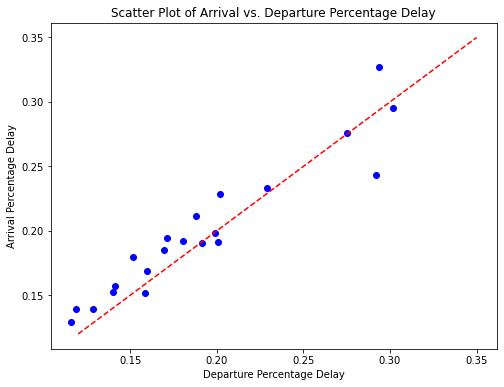

In [19]:
# Create visualization to see if there is a relationship between departure and arrival delay
plt.figure(figsize=(8, 6))
plt.scatter(percentage_delay_airline['Departure_percentage_delay'], percentage_delay_airline['Arrival_percentage_delay'], c='b', marker='o', label='Airlines')
plt.plot([0.12, 0.35], [0.12, 0.35], color='r', linestyle='--')

# Add labels and a title
plt.xlabel('Departure Percentage Delay')
plt.ylabel('Arrival Percentage Delay')
plt.title('Scatter Plot of Arrival vs. Departure Percentage Delay')

<b> Conclusions <b/>
- There is a relationahip between departure delay and arrival delay
- For departure delays ratios of < 25% most airlines will experience a higher percentage of delay arrivals
- For departure delays ratios greater than 25% most airlines in the space arrive at the expected time or earlier
- Could this mean that there are some airlines that expect to have higher percentage of delays and therefore give themselves more time?

<b> Implications for analysis <b/>
- It would make sense to think that customers mostly care about arrival delays because they would plan according to the arrival time and not so much the departure time
- Additionally, arrival time is used for airline puctuality and departure time for airport puctuality
- Need to understand the average delay for each of the flights delayed, especially for airlines that have really close ratios of arrival delay. The raionale is that it's not the same to have 17% of my flights delayed by 20 minutes on average than 15% delayed by 50 minutes

In [20]:
# Get average delay for delayed flights
average_arrdelay = total_data[total_data['ArrDel15'] == 1].groupby('Operating_Airline')['ArrDelay'].mean().reset_index()

# Merge data with maser table about delays
percentage_delay_airline = percentage_delay_airline.merge(average_arrdelay, on='Operating_Airline')

percentage_delay_airline

,Operating_Airline,Flights,Arrival_delayed_flights,Departure_delayed_flights,Arrival_percentage_delay,Departure_percentage_delay,ArrDelay
0,9E,254217,32935.0,29434.0,0.129555,0.115783,77.024624
1,AA,855494,169487.0,170262.0,0.198116,0.199022,73.479913
2,AS,216464,42067.0,37031.0,0.194337,0.171072,49.772530
3,B6,255528,75401.0,77161.0,0.295079,0.301967,77.266203
4,C5,81136,17141.0,15237.0,0.211263,0.187796,81.459191
5,DL,859780,130409.0,136341.0,0.151677,0.158577,68.764587
6,F9,151060,41721.0,41588.0,0.276188,0.275308,69.862156
7,G4,118779,38843.0,34878.0,0.327019,0.293638,65.525526
8,G7,64892,14857.0,13103.0,0.228950,0.201920,78.549842
9,HA,72774,10136.0,9343.0,0.139281,0.128384,43.338299


Text(0.5, 1.0, 'Scatter Plot of Average delay vs. Arrival Percentage Delay')

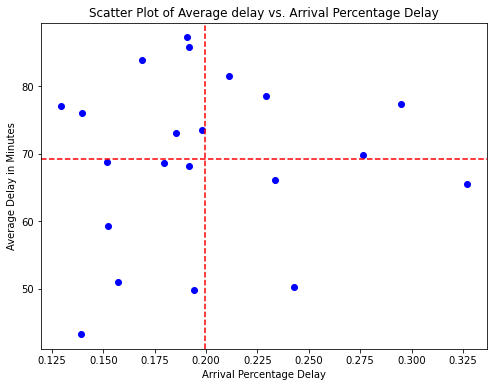

In [21]:
# Create visualization to identify high delay high time secotrs
plt.figure(figsize=(8, 6))
plt.scatter(percentage_delay_airline['Arrival_percentage_delay'], percentage_delay_airline['ArrDelay'], c='b', marker='o', label='Airlines')

# Add reference lines
mean_arrival_percentage_delay = percentage_delay_airline['Arrival_percentage_delay'].mean()
mean_arrival_delay = percentage_delay_airline['ArrDelay'].mean()
plt.axvline(x=mean_arrival_percentage_delay, color='r', linestyle='--')
plt.axhline(y=mean_arrival_delay, color='r', linestyle='--')

# Add labels and a title
plt.xlabel('Arrival Percentage Delay')
plt.ylabel('Average Delay in Minutes')
plt.title('Scatter Plot of Average delay vs. Arrival Percentage Delay')

<b> Conclusions <b/>
- The worse performing airlines are the ones above average on the two axes (4 airlines)
- The best performing airlines are the ones below average on the two axes (7 airlines)
- The rest of the airlines perform poorly on one of the axis, with the most commong behavior being lower than average delay ratio but higher than average delay time
- An additional analysis to perform to evaluate airlines is to calculate the expected delay by multiplying the percentage of delays vs the average delay

In [22]:
# Calculate expected delay
percentage_delay_airline['Expected_delay'] = percentage_delay_airline['Arrival_percentage_delay'] * percentage_delay_airline['ArrDelay']
percentage_delay_airline.sort_values(by = 'Expected_delay', ascending=False)

,Operating_Airline,Flights,Arrival_delayed_flights,Departure_delayed_flights,Arrival_percentage_delay,Departure_percentage_delay,ArrDelay,Expected_delay
3,B6,255528,75401.0,77161.0,0.295079,0.301967,77.266203,22.799650
7,G4,118779,38843.0,34878.0,0.327019,0.293638,65.525526,21.428098
6,F9,151060,41721.0,41588.0,0.276188,0.275308,69.862156,19.295108
8,G7,64892,14857.0,13103.0,0.228950,0.201920,78.549842,17.983958
4,C5,81136,17141.0,15237.0,0.211263,0.187796,81.459191,17.209278
18,YV,142137,27110.0,27200.0,0.190731,0.191365,87.167577,16.625601
20,ZW,80631,15464.0,14565.0,0.191787,0.180638,85.688632,16.433989
11,NK,217455,50768.0,49813.0,0.233464,0.229073,66.062658,15.423278
1,AA,855494,169487.0,170262.0,0.198116,0.199022,73.479913,14.557542
13,OO,780533,131820.0,124624.0,0.168885,0.159665,83.838591,14.159046


## Most popular days of the week

In [23]:
# Get the day of the week for each date
total_data['day_of_week'] = total_data['FlightDate'].dt.dayofweek
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_data['day_name'] = total_data['day_of_week'].map(lambda x: day_names[x])

In [25]:
#Get the total number of flights per day
flights_per_day = total_data.groupby('day_name').agg(Flights=('day_name', 'size')).reset_index()
flights_per_day.sort_values(by = 'Flights', ascending=False)

,day_name,Flights
3,Sunday,1046411
4,Thursday,1041450
1,Monday,1039025
0,Friday,1038962
6,Wednesday,979318
5,Tuesday,959239
2,Saturday,905627


## Most flown sectors

In [26]:
# Count the number of unique IDs that each airport has (the README says that airports ca nchange airport code)
origins_per_ID = total_data.groupby('OriginAirportID').agg(IDs=('Origin', 'nunique')).reset_index()

# Divide the sum of IDs by the count of IDs, if = 1 we can conclude that in the year in analysis no airport changed name and therefore we can use Origin for route analysis
origins_per_ID['IDs'].sum()/origins_per_ID['IDs'].count()

1.0

In [27]:
# Repeat the same analysis for destination aairports
dest_per_ID = total_data.groupby('DestAirportID').agg(IDs=('Dest', 'nunique')).reset_index()

# Divide the sum of IDs by the count of IDs, if = 1 we can conclude that in the year in analysis no airport changed name and therefore we can use Origin for route analysis
dest_per_ID['IDs'].sum()/dest_per_ID['IDs'].count()

1.0

In [28]:
# Create sector variable using Origin and Destination as input
total_data['Sector'] = total_data['Origin'] + '-' + total_data['Dest']

In [29]:
flights_sector = total_data.groupby('Sector').agg(Flights=('Sector', 'size')).reset_index()
flights_sector.sort_values(by='Flights', ascending = False).head(20)

,Sector,Flights
3694,LAX-SFO,11222
6395,SFO-LAX,11210
3815,LGA-ORD,10784
4923,ORD-LGA,10783
1571,DCA-BOS,9939
774,BOS-DCA,9939
3648,LAX-LAS,9869
3525,LAS-LAX,9840
2801,HNL-OGG,9784
4718,OGG-HNL,9781


## Additional analyses

### Cancelled flights analysis

#### Ratio of cancelled flights

In [30]:
# Cancelled flights performance of industry
cancelled_flights_total = total_data.groupby('Operating_Airline').agg(Flights=('Operating_Airline', 'size'), Cancelled_flights=('Cancelled', 'sum')).reset_index()
cancelled_flights_total['Cancellation_rate'] = cancelled_flights_total['Cancelled_flights'] / cancelled_flights_total['Flights']
cancelled_flights_total.sort_values(by = 'Cancellation_rate', ascending = False)

,Operating_Airline,Flights,Cancelled_flights,Cancellation_rate
8,G7,64892,3766.0,0.058035
19,YX,343752,13763.0,0.040038
11,NK,217455,8665.0,0.039847
7,G4,118779,4646.0,0.039115
3,B6,255528,9542.0,0.037342
20,ZW,80631,2946.0,0.036537
18,YV,142137,4893.0,0.034425
1,AA,855494,27954.0,0.032676
4,C5,81136,2339.0,0.028828
12,OH,238014,6250.0,0.026259


American Airlines ranks 8th out of 21 in cancellation rate. Let's look at cancellation rate vs number of flights to see how it performs against similiary size airlines

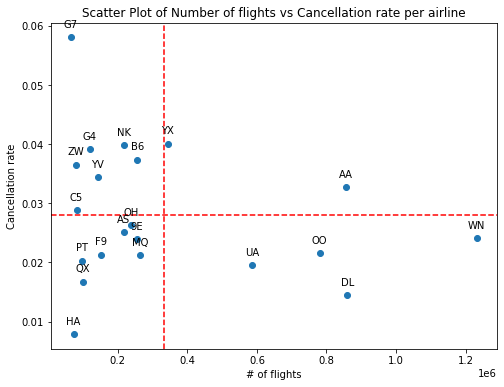

In [31]:
# Build scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(cancelled_flights_total['Flights'], cancelled_flights_total['Cancellation_rate'])

# Get mean for x and y axis
mean_flights = cancelled_flights_total['Flights'].mean()
mean_cancellation_rate = cancelled_flights_total['Cancellation_rate'].mean()

plt.xlabel('# of flights')
plt.ylabel('Cancellation rate')
plt.title('Scatter Plot of Number of flights vs Cancellation rate per airline')

# Add reference lines
plt.axvline(x=mean_flights, color='r', linestyle='--')
plt.axhline(y=mean_cancellation_rate, color='r', linestyle='--')

# Annotate graph with labels
for i, label in enumerate(cancelled_flights_total['Operating_Airline']):
    plt.annotate(label, (cancelled_flights_total['Flights'].iloc[i], cancelled_flights_total['Cancellation_rate'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(False)
plt.show()

While from the first table it seemed as if our client was perfoming in the lower mid table, from this graph we can see that for airlines of similar size, our client is having a poor performance on cancellation rate. Next let's explore reasons for cancellation.

#### Cancelled reasons analysis

In [32]:
cancelled_reasons = total_data.groupby(['Operating_Airline','CancellationCode'], as_index = False).agg(Count = ('CancellationCode', 'size')).pivot(index='Operating_Airline', columns='CancellationCode', values='Count').reset_index()
cancelled_reasons['Total_Cancellations'] = cancelled_reasons.sum(axis=1)
cancelled_reasons['Carrier (A)'] = (cancelled_reasons['A'] / cancelled_reasons['Total_Cancellations'])
cancelled_reasons['Weather (B)'] = (cancelled_reasons['B'] / cancelled_reasons['Total_Cancellations'])
cancelled_reasons['National Air System (C)'] = (cancelled_reasons['C'] / cancelled_reasons['Total_Cancellations'])
cancelled_reasons['Security (D)'] = (cancelled_reasons['D'] / cancelled_reasons['Total_Cancellations'])

C:\Users\Mauricio\AppData\Local\Temp\ipykernel_19120\1157652175.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cancelled_reasons['Total_Cancellations'] = cancelled_reasons.sum(axis=1)


In [33]:
cancelled_reasons

CancellationCode,Operating_Airline,A,B,C,D,Total_Cancellations,Carrier (A),Weather (B),National Air System (C),Security (D)
0,9E,1664.0,2229.0,2202.0,NaN,6095.0,0.273011,0.365710,0.361280,NaN
1,AA,12770.0,13492.0,1689.0,3.0,27954.0,0.456822,0.482650,0.060421,0.000107
2,AS,4574.0,807.0,47.0,1.0,5429.0,0.842512,0.148646,0.008657,0.000184
3,B6,5173.0,3310.0,1059.0,NaN,9542.0,0.542130,0.346887,0.110983,NaN
4,C5,919.0,1283.0,114.0,23.0,2339.0,0.392903,0.548525,0.048739,0.009833
5,DL,8375.0,3122.0,936.0,NaN,12433.0,0.673611,0.251106,0.075284,NaN
6,F9,1936.0,1281.0,NaN,NaN,3217.0,0.601803,0.398197,NaN,NaN
7,G4,3231.0,1147.0,258.0,10.0,4646.0,0.695437,0.246879,0.055532,0.002152
8,G7,762.0,2473.0,521.0,10.0,3766.0,0.202337,0.656665,0.138343,0.002655
9,HA,561.0,15.0,NaN,NaN,576.0,0.973958,0.026042,NaN,NaN


About 46% of cancellations are attributed to the airline, which is mid-table performance. The issue is that in weather related cancellations AA is also performing at the average. It seems as if airlines that operate in routes with high weather cancellations (weather cancellations are out of control for the airline) compensate this by having a more robust operation that would yield lower cancellations. There is also the option of always having more or less the same proportion of weather and carrier cancellations. Let's evaluate correlation between proportions.

In [34]:
cancelled_reasons.iloc[:,6:10].corr()

CancellationCode,Carrier (A),Weather (B),National Air System (C),Security (D)
CancellationCode,,,,
Carrier (A),1.000000,-0.935952,-0.522146,-0.030375
Weather (B),-0.935952,1.000000,0.147117,-0.016846
National Air System (C),-0.522146,0.147117,1.000000,-0.208103
Security (D),-0.030375,-0.016846,-0.208103,1.000000


There is a very high correlation between carrier and weather, while with the others there is not. This leads to the hypothesis that airlines operating in sectors with high chances of weather disruption tend to have a more robust operation in those locations to compensate. We would need to have interviews to validate this hypothesis. To further explore this, I will analyze the same indicators on a route basis but aggregating the data by quartiles. <b> Update: <b/> After further research it turns out that weather is a category that airlines self report and not that the airports are cancelling the flights (except extreme conditions which are not very common). So given the new industry knowledge this hypothesis no longer holds true. The relationship observed seems to be from observing proportions of two variables that represent usually over 90% of the total cancellations.

#### Cancelled flights by sector

In [35]:
cancelled_flights_AA = total_data[total_data['Operating_Airline'] == 'AA'].groupby('Sector', as_index = False).agg(Flights = ('Sector', 'size'), Cancelled_flights = ('Cancelled', 'sum'))
cancelled_flights_AA['Cancellation_rate'] = cancelled_flights_AA['Cancelled_flights'] / cancelled_flights_AA['Flights']

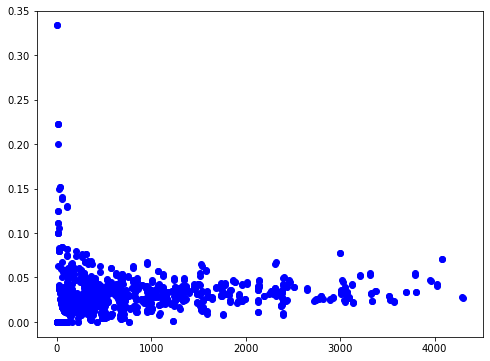

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(cancelled_flights_AA['Flights'], cancelled_flights_AA['Cancellation_rate'], c='b', marker='o')

plt.grid(False)
plt.show()

There doesn't seem to be a relationship between high frequency sectors and cancellation rates, meaning that all sectors are having the same rates. Let's compare cancellation rates of AA vs the market per route.

In [37]:
# Get the cancellation rate of the rest of the airlines per sector excluding AA
cancelled_flights_sector = total_data[total_data['Operating_Airline'] != 'AA'].groupby('Sector', as_index = False).agg(Flights_benchmark = ('Sector', 'size'), Cancelled_flights_benchmark = ('Cancelled', 'sum'))
cancelled_flights_sector['Cancellation_rate_benchmark'] = cancelled_flights_sector['Cancelled_flights_benchmark'] / cancelled_flights_sector['Flights_benchmark']

In [38]:
# Merge data of the market to the AA table
cancelled_flights_AA = cancelled_flights_AA.merge(cancelled_flights_sector, on='Sector')

In [39]:
cancelled_flights_AA.head()

,Sector,Flights,Cancelled_flights,Cancellation_rate,Flights_benchmark,Cancelled_flights_benchmark,Cancellation_rate_benchmark
0,ABQ-DFW,2285,74.0,0.032385,93,4.0,0.043011
1,ABQ-LAX,1,0.0,0.000000,2320,27.0,0.011638
2,ABQ-ORD,145,4.0,0.027586,734,8.0,0.010899
3,ABQ-PHX,456,10.0,0.021930,2111,45.0,0.021317
4,AGS-CLT,2,0.0,0.000000,1657,36.0,0.021726


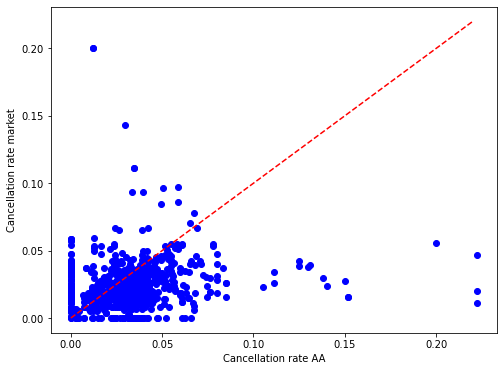

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(cancelled_flights_AA['Cancellation_rate'], cancelled_flights_AA['Cancellation_rate_benchmark'], c='b', marker='o')
plt.plot([0, 0.22], [0, 0.22], color='r', linestyle='--')

plt.xlabel('Cancellation rate AA')
plt.ylabel('Cancellation rate market')

plt.grid(False)
plt.show()

It seems as if mostly AA has a worse performance than the market on most routes, but we need to account for how relevant those routes are.

In [41]:
cancelled_flights_AA['Market-AA_diff'] = cancelled_flights_AA['Cancellation_rate_benchmark'] - cancelled_flights_AA['Cancellation_rate']

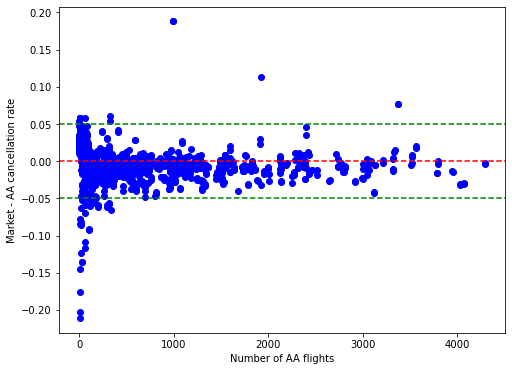

In [42]:
# Create graph
plt.figure(figsize=(8, 6))
plt.scatter(cancelled_flights_AA['Flights'], cancelled_flights_AA['Market-AA_diff'], c='b', marker='o')

plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=-0.05, color='g', linestyle='--')
plt.axhline(y=0.05, color='g', linestyle='--')

plt.xlabel('Number of AA flights')
plt.ylabel('Market - AA cancellation rate')

plt.grid(False)
plt.show()

We can see that AA tends to underperform (difference < 0) and in the cases where they beat the market it is mostly in sectors that from a volume perspective are not very relevant. In most of the most relevant sectors they tend to underperform. On the bright side we have that the difference doesn't seem to be too big, most differences are < 5%.

In [43]:
# Export data to use in PowerPoint
cancelled_flights_AA.to_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/flights_AA.csv', index=False)

#### Cancelled reasons by sector

In [44]:
# Get cancelled reasons for AA by sector
cancelled_reasons_AA = total_data[total_data['Operating_Airline'] == 'AA'].groupby(['Sector','CancellationCode'], as_index = False).agg(Count = ('CancellationCode', 'size')).pivot(index='Sector', columns='CancellationCode', values='Count').reset_index()
cancelled_reasons_AA['Total_Cancellations'] = cancelled_reasons_AA.sum(axis=1)
cancelled_reasons_AA['Carrier (A)'] = (cancelled_reasons_AA['A'] / cancelled_reasons_AA['Total_Cancellations'])
cancelled_reasons_AA['Weather (B)'] = (cancelled_reasons_AA['B'] / cancelled_reasons_AA['Total_Cancellations'])
cancelled_reasons_AA['National Air System (C)'] = (cancelled_reasons_AA['C'] / cancelled_reasons_AA['Total_Cancellations'])
cancelled_reasons_AA['Security (D)'] = (cancelled_reasons_AA['D'] / cancelled_reasons_AA['Total_Cancellations'])

C:\Users\Mauricio\AppData\Local\Temp\ipykernel_19120\199090434.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cancelled_reasons_AA['Total_Cancellations'] = cancelled_reasons_AA.sum(axis=1)


In [45]:
# Get cancelled reasons for Market by sector
cancelled_reasons_market = total_data[total_data['Operating_Airline'] != 'AA'].groupby(['Sector','CancellationCode'], as_index = False).agg(Count = ('CancellationCode', 'size')).pivot(index='Sector', columns='CancellationCode', values='Count').reset_index()
cancelled_reasons_market['Total_Cancellations_market'] = cancelled_reasons_market.sum(axis=1)
cancelled_reasons_market['Carrier (A)_market'] = (cancelled_reasons_market['A'] / cancelled_reasons_market['Total_Cancellations_market'])
cancelled_reasons_market['Weather (B)_market'] = (cancelled_reasons_market['B'] / cancelled_reasons_market['Total_Cancellations_market'])
cancelled_reasons_market['National Air System (C)_market'] = (cancelled_reasons_market['C'] / cancelled_reasons_market['Total_Cancellations_market'])
cancelled_reasons_market['Security (D)_market'] = (cancelled_reasons_market['D'] / cancelled_reasons_market['Total_Cancellations_market'])

C:\Users\Mauricio\AppData\Local\Temp\ipykernel_19120\2293035364.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cancelled_reasons_market['Total_Cancellations_market'] = cancelled_reasons_market.sum(axis=1)


In [46]:
cancelled_reasons_AA = cancelled_reasons_AA.merge(cancelled_reasons_market, on = 'Sector')

In [47]:
cancelled_reasons_AA.head()

CancellationCode,Sector,A_x,B_x,C_x,D_x,Total_Cancellations,Carrier (A),Weather (B),National Air System (C),Security (D),A_y,B_y,C_y,D_y,Total_Cancellations_market,Carrier (A)_market,Weather (B)_market,National Air System (C)_market,Security (D)_market
0,ABQ-DFW,29.0,40.0,5.0,NaN,74.0,0.391892,0.540541,0.067568,NaN,NaN,3.0,1.0,NaN,4.0,NaN,0.750000,0.250000,NaN
1,ABQ-ORD,1.0,2.0,1.0,NaN,4.0,0.250000,0.500000,0.250000,NaN,3.0,4.0,1.0,NaN,8.0,0.375000,0.500000,0.125000,NaN
2,ABQ-PHX,10.0,NaN,NaN,NaN,10.0,1.000000,NaN,NaN,NaN,38.0,7.0,NaN,NaN,45.0,0.844444,0.155556,NaN,NaN
3,ALB-CLT,15.0,8.0,NaN,NaN,23.0,0.652174,0.347826,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,1.000000,NaN,NaN
4,AMA-DFW,5.0,9.0,1.0,NaN,15.0,0.333333,0.600000,0.066667,NaN,11.0,35.0,5.0,NaN,51.0,0.215686,0.686275,0.098039,NaN


In [48]:
# Merge data to dataet with number of flights
cancelled_flights_AA = cancelled_flights_AA.merge(cancelled_reasons_AA[['Sector', 'Carrier (A)', 'Weather (B)', 'National Air System (C)', 'Security (D)', 'Carrier (A)_market', 'Weather (B)_market', 'National Air System (C)_market', 'Security (D)_market']], on = 'Sector')

In [49]:
cancelled_flights_AA = cancelled_flights_AA.fillna(0)

In [50]:
cancelled_flights_AA.head()

,Sector,Flights,Cancelled_flights,Cancellation_rate,Flights_benchmark,Cancelled_flights_benchmark,Cancellation_rate_benchmark,Market-AA_diff,Carrier (A),Weather (B),National Air System (C),Security (D),Carrier (A)_market,Weather (B)_market,National Air System (C)_market,Security (D)_market
0,ABQ-DFW,2285,74.0,0.032385,93,4.0,0.043011,0.010626,0.391892,0.540541,0.067568,0.0,0.000000,0.750000,0.250000,0.0
1,ABQ-ORD,145,4.0,0.027586,734,8.0,0.010899,-0.016687,0.250000,0.500000,0.250000,0.0,0.375000,0.500000,0.125000,0.0
2,ABQ-PHX,456,10.0,0.021930,2111,45.0,0.021317,-0.000613,1.000000,0.000000,0.000000,0.0,0.844444,0.155556,0.000000,0.0
3,ALB-CLT,896,23.0,0.025670,115,3.0,0.026087,0.000417,0.652174,0.347826,0.000000,0.0,0.000000,1.000000,0.000000,0.0
4,AMA-DFW,297,15.0,0.050505,1706,51.0,0.029894,-0.020611,0.333333,0.600000,0.066667,0.0,0.215686,0.686275,0.098039,0.0


In [51]:
# Create difference between market benchmark and AA cancellations because of carrier
cancelled_flights_AA['Carrier_diff'] = cancelled_flights_AA['Carrier (A)_market'] - cancelled_flights_AA['Carrier (A)']
cancelled_flights_AA['Weather_diff'] = cancelled_flights_AA['Weather (B)_market'] - cancelled_flights_AA['Weather (B)']

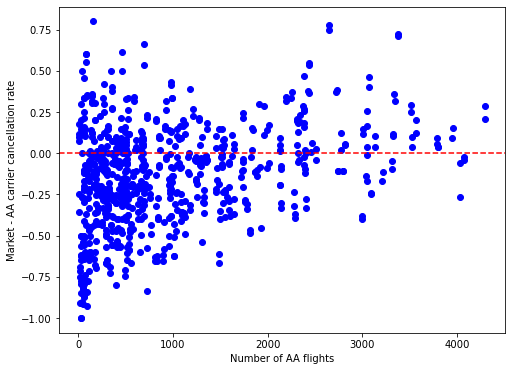

In [52]:
# Create graph
plt.figure(figsize=(8, 6))
plt.scatter(cancelled_flights_AA['Flights'], cancelled_flights_AA['Carrier_diff'], c='b', marker='o')

plt.axhline(y=0, color='r', linestyle='--')
#plt.axhline(y=-0.05, color='g', linestyle='--')
#plt.axhline(y=0.05, color='g', linestyle='--')

plt.xlabel('Number of AA flights')
plt.ylabel('Market - AA carrier cancellation rate')

plt.grid(False)
plt.show()

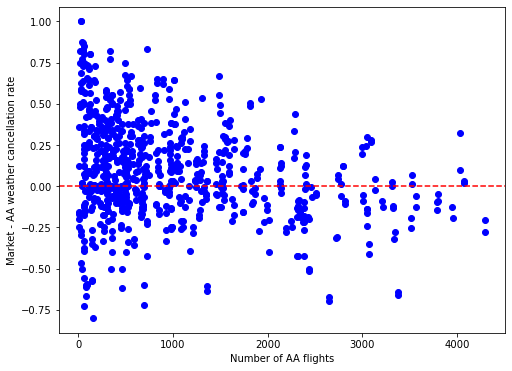

In [53]:
# Create graph
plt.figure(figsize=(8, 6))
plt.scatter(cancelled_flights_AA['Flights'], cancelled_flights_AA['Weather_diff'], c='b', marker='o')

plt.axhline(y=0, color='r', linestyle='--')
#plt.axhline(y=-0.05, color='g', linestyle='--')
#plt.axhline(y=0.05, color='g', linestyle='--')

plt.xlabel('Number of AA flights')
plt.ylabel('Market - AA weather cancellation rate')

plt.grid(False)
plt.show()

There are 2 distinct patterns in the graphs. On one hand, for sectors with more than 2000 flights AA has a very strong performance vs the competition in carrier cancellations but is lagging in weather cancellations. Potentially indicating that they need to improve their meteorologists team or revisit their policies for canceling a flight to make them match the market. On the other hand we have sectors with less than 2000 flights where the situation is the oppositve. AA is underperforming in carrier cancelattions but overperforming in weather. Let's evaluate overlap between airports, if we see a low overlap it would mean that the issue is at the airport of operation level (AA is better at operating at some airports than others). IF we see a high overlap it would mean that despite the routes are operating from the same airports, the issues of cancellations that we see are due to differences of consistency of operation in the same airport.

In [54]:
# Split sector in 2 columns (faster than bringing the data from the master dataset)
cancelled_flights_AA[['Origin', 'Destination']] = cancelled_flights_AA['Sector'].str.split('-', n=1, expand=True)

In [55]:
origin_more_2000 = pd.DataFrame(cancelled_flights_AA.loc[cancelled_flights_AA['Flights'] >= 2000, 'Origin'].unique())
origin_less_2000 = pd.DataFrame(cancelled_flights_AA.loc[cancelled_flights_AA['Flights'] < 2000, 'Origin'].unique())
(origin_more_2000[0].isin(origin_less_2000[0])).sum()/(origin_more_2000[0].isin(origin_less_2000[0])).count()

1.0

In [56]:
destination_more_2000 = pd.DataFrame(cancelled_flights_AA.loc[cancelled_flights_AA['Flights'] >= 2000, 'Destination'].unique())
destination_less_2000 = pd.DataFrame(cancelled_flights_AA.loc[cancelled_flights_AA['Flights'] < 2000, 'Destination'].unique())
(destination_more_2000[0].isin(destination_less_2000[0])).sum()/(destination_more_2000[0].isin(destination_less_2000[0])).count()

1.0

As there is 100% of overlap both in origin and destination airports, we can say that there is an issue of how consistent AA is at operating at each airport.

#### Network analysis

Let's do an analysis of the network to identify some of the most important airports for AA. The idea is to find the hub and best connected airport, ideally we want both to me the same. I will also look at the number of stops required to connect all the possible nodes (airports in the network)

##### AA Network analysis

In [175]:
# Create netwrok for AA
G = nx.Graph()
for airport in set(cancelled_flights_AA['Origin']).union(cancelled_flights_AA['Destination']):
    G.add_node(airport)

for i, row in cancelled_flights_AA.iterrows():
    origin = row['Origin']
    destination = row['Destination']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

In [176]:
# Calculate all-pairs shortest paths
all_shortest_paths = dict(nx.all_pairs_shortest_path(G))

# Calculate the total number of stops for all routes
total_stops = 0
total_routes = 0

for origin in G.nodes():
    for destination in G.nodes():
        if origin != destination:
            shortest_path = all_shortest_paths[origin][destination]
            total_stops += len(shortest_path) - 1  # Subtract 1 to exclude the starting node
            total_routes += 1

# Calculate the average number of stops
average_stops = total_stops / total_routes

print("Average number of stops:", average_stops)

Average number of stops: 2.1816933638443934


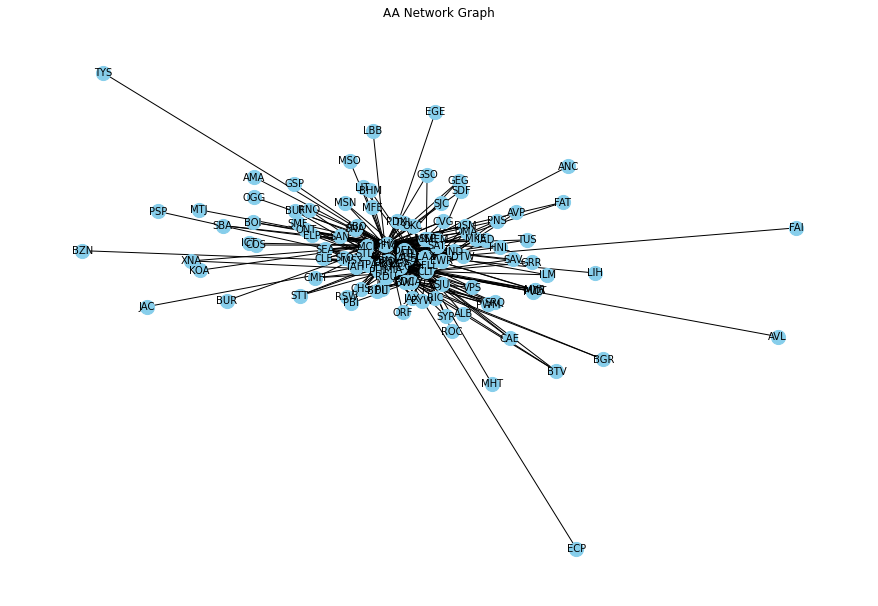

In [165]:
# Graph network
pos = nx.spring_layout(G, seed = 1)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=10, font_color='black')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='darkgray')
plt.title("AA Network Graph")
plt.axis('off')
plt.show()

In [59]:
degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

Node with the highest degree centrality: DFW


DFW is the airport the has the most number of flights, given this network it would mean that it is AA's central hub.

In [60]:
betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

Node with the highest betweenness centrality: DFW


DFW is also the hub with the highest number of connections to other airports.

In [61]:
eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest eigenvector centrality: ORD


Chicago O'Hare is the airport that is connected to most connected airports, could be considered a key airport as well.

##### Network for WN

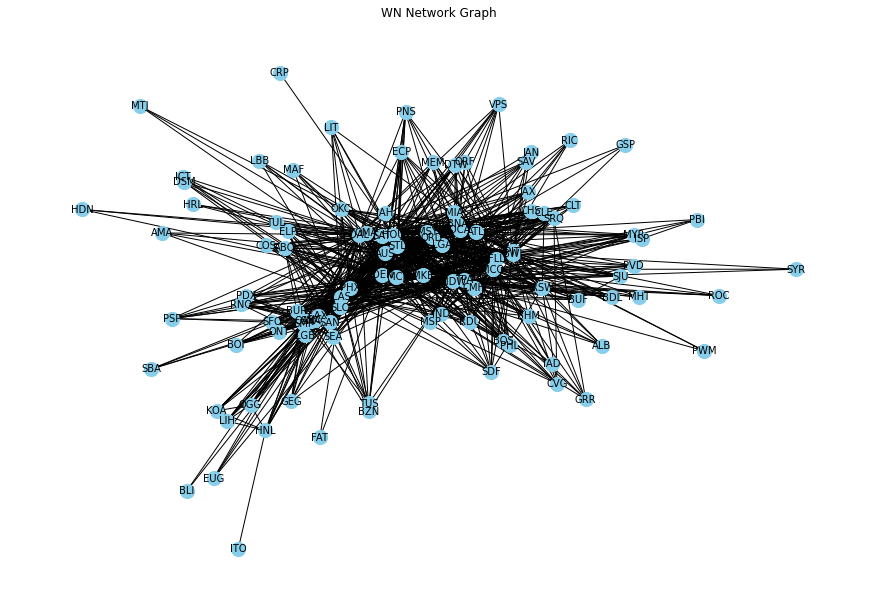

In [177]:
# Create dataset for network

flights_WN = total_data[total_data['Operating_Airline'] == 'WN'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok for WN
G = nx.Graph()
for airport in set(flights_WN['Origin']).union(flights_WN['Dest']):
    G.add_node(airport)

for i, row in flights_WN.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)
    
# Graph network
pos = nx.spring_layout(G, seed = 1)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=10, font_color='black')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='darkgray')
plt.title("WN Network Graph")
plt.axis('off')
plt.show()

In [178]:
# Calculate all-pairs shortest paths
all_shortest_paths = dict(nx.all_pairs_shortest_path(G))

# Calculate the total number of stops for all routes
total_stops = 0
total_routes = 0

for origin in G.nodes():
    for destination in G.nodes():
        if origin != destination:
            shortest_path = all_shortest_paths[origin][destination]
            total_stops += len(shortest_path) - 1  # Subtract 1 to exclude the starting node
            total_routes += 1

# Calculate the average number of stops
average_stops = total_stops / total_routes

print("Average number of stops:", average_stops)

Average number of stops: 1.929642038441192


In [111]:
degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

Node with the highest degree centrality: DEN


In [112]:
betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

Node with the highest betweenness centrality: DEN


In [113]:
eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest eigenvector centrality: DEN


##### Network for DL

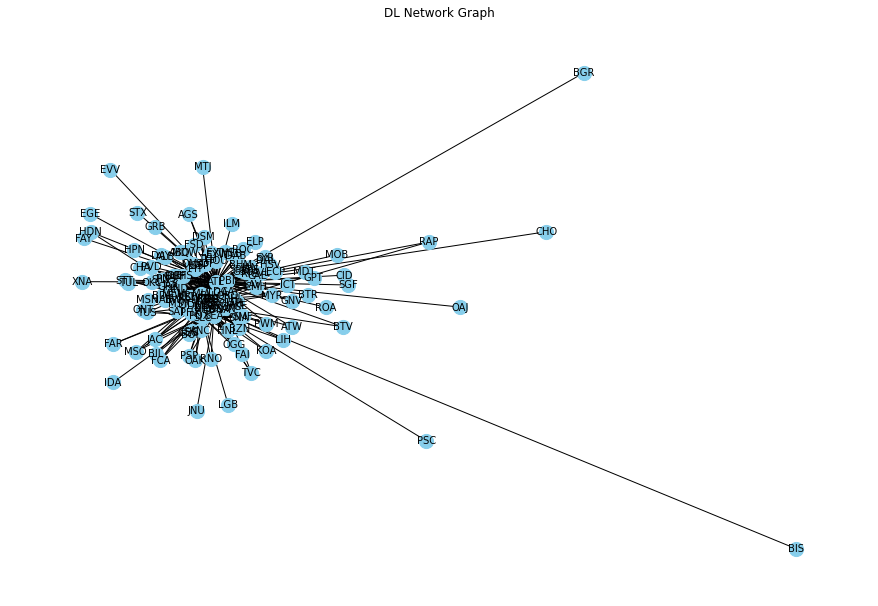

In [179]:
# Create dataset for network

flights_DL = total_data[total_data['Operating_Airline'] == 'DL'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok for DL
G = nx.Graph()
for airport in set(flights_DL['Origin']).union(flights_DL['Dest']):
    G.add_node(airport)

for i, row in flights_DL.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)
    
# Graph network
pos = nx.spring_layout(G, seed = 1)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=10, font_color='black')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='darkgray')
plt.title("DL Network Graph")
plt.axis('off')
plt.show()

In [180]:
# Calculate all-pairs shortest paths
all_shortest_paths = dict(nx.all_pairs_shortest_path(G))

# Calculate the total number of stops for all routes
total_stops = 0
total_routes = 0

for origin in G.nodes():
    for destination in G.nodes():
        if origin != destination:
            shortest_path = all_shortest_paths[origin][destination]
            total_stops += len(shortest_path) - 1  # Subtract 1 to exclude the starting node
            total_routes += 1

# Calculate the average number of stops
average_stops = total_stops / total_routes

print("Average number of stops:", average_stops)

Average number of stops: 2.0405290505432214


In [118]:
degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: ATL
Node with the highest betweenness centrality: ATL
Node with the highest eigenvector centrality: ATL


##### Network for OO

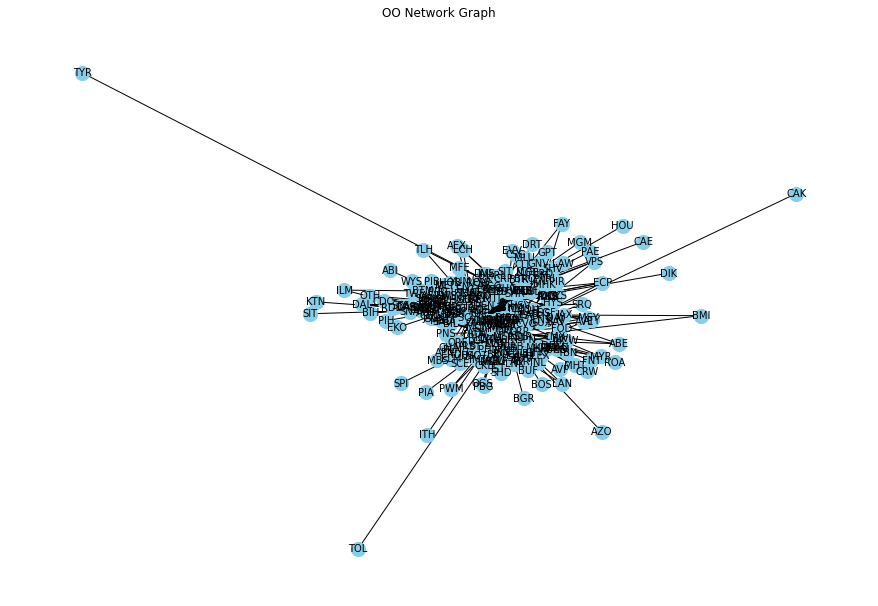

Node with the highest degree centrality: DEN
Node with the highest betweenness centrality: ORD
Node with the highest eigenvector centrality: DEN


In [181]:
# Create dataset for network

flights_OO = total_data[total_data['Operating_Airline'] == 'OO'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok for OO
G = nx.Graph()
for airport in set(flights_OO['Origin']).union(flights_OO['Dest']):
    G.add_node(airport)

for i, row in flights_OO.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)
    
# Graph network
pos = nx.spring_layout(G, seed = 1)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=10, font_color='black')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='darkgray')
plt.title("OO Network Graph")
plt.axis('off')
plt.show()

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

In [182]:
# Calculate all-pairs shortest paths
all_shortest_paths = dict(nx.all_pairs_shortest_path(G))

# Calculate the total number of stops for all routes
total_stops = 0
total_routes = 0

for origin in G.nodes():
    for destination in G.nodes():
        if origin != destination:
            shortest_path = all_shortest_paths[origin][destination]
            total_stops += len(shortest_path) - 1  # Subtract 1 to exclude the starting node
            total_routes += 1

# Calculate the average number of stops
average_stops = total_stops / total_routes

print("Average number of stops:", average_stops)

Average number of stops: 2.383870609776397


##### Network of UA

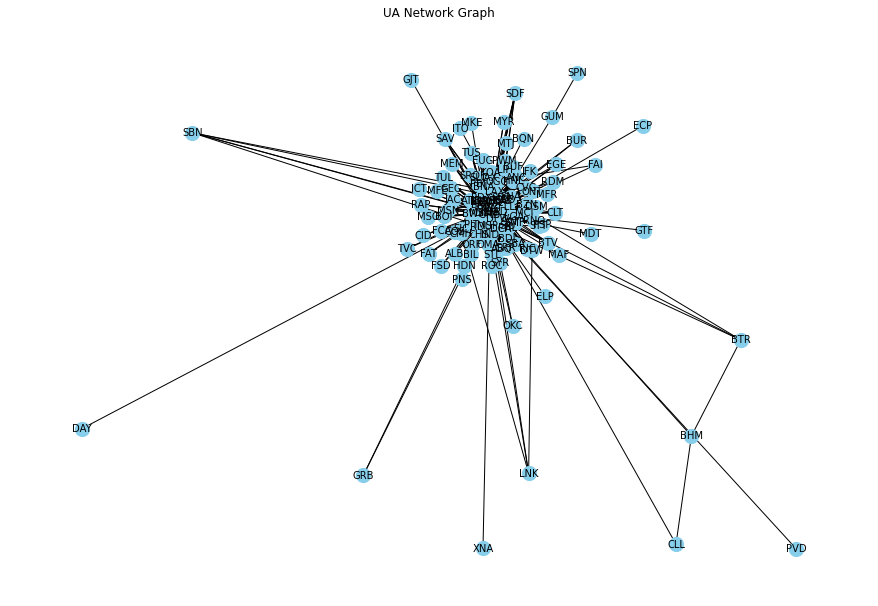

Node with the highest degree centrality: ORD
Node with the highest betweenness centrality: ORD
Node with the highest eigenvector centrality: ORD


In [183]:
# Create dataset for network

flights_UA = total_data[total_data['Operating_Airline'] == 'UA'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok for UA
G = nx.Graph()
for airport in set(flights_UA['Origin']).union(flights_UA['Dest']):
    G.add_node(airport)

for i, row in flights_UA.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)
    
# Graph network
pos = nx.spring_layout(G, seed = 1)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=10, font_color='black')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='darkgray')
plt.title("UA Network Graph")
plt.axis('off')
plt.show()

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

In [184]:
# Calculate all-pairs shortest paths
all_shortest_paths = dict(nx.all_pairs_shortest_path(G))

# Calculate the total number of stops for all routes
total_stops = 0
total_routes = 0

for origin in G.nodes():
    for destination in G.nodes():
        if origin != destination:
            shortest_path = all_shortest_paths[origin][destination]
            total_stops += len(shortest_path) - 1  # Subtract 1 to exclude the starting node
            total_routes += 1

# Calculate the average number of stops
average_stops = total_stops / total_routes

print("Average number of stops:", average_stops)

Average number of stops: 2.061631261473905


##### Netowrk G7

In [123]:
# Create dataset for network

flights_G7 = total_data[total_data['Operating_Airline'] == 'G7'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok for G7
G = nx.Graph()
for airport in set(flights_G7['Origin']).union(flights_G7['Dest']):
    G.add_node(airport)

for i, row in flights_G7.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: ORD
Node with the highest betweenness centrality: ORD
Node with the highest eigenvector centrality: ORD


##### Netowrk YX

In [124]:
# Create dataset for network

flights = total_data[total_data['Operating_Airline'] == 'YX'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok
G = nx.Graph()
for airport in set(flights['Origin']).union(flights['Dest']):
    G.add_node(airport)

for i, row in flights.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: ORD
Node with the highest betweenness centrality: ORD
Node with the highest eigenvector centrality: ORD


##### Network NK

In [125]:
# Create dataset for network

flights = total_data[total_data['Operating_Airline'] == 'NK'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok
G = nx.Graph()
for airport in set(flights['Origin']).union(flights['Dest']):
    G.add_node(airport)

for i, row in flights.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: MCO
Node with the highest betweenness centrality: MCO
Node with the highest eigenvector centrality: FLL


##### Netowrk G4

In [126]:
# Create dataset for network

flights = total_data[total_data['Operating_Airline'] == 'G4'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok
G = nx.Graph()
for airport in set(flights['Origin']).union(flights['Dest']):
    G.add_node(airport)

for i, row in flights.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: SFB
Node with the highest betweenness centrality: LAS
Node with the highest eigenvector centrality: SFB


##### Netowrk B6

In [127]:
# Create dataset for network

flights = total_data[total_data['Operating_Airline'] == 'B6'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok
G = nx.Graph()
for airport in set(flights['Origin']).union(flights['Dest']):
    G.add_node(airport)

for i, row in flights.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: JFK
Node with the highest betweenness centrality: JFK
Node with the highest eigenvector centrality: BOS


##### Nwtwork ZW

In [128]:
# Create dataset for network

flights = total_data[total_data['Operating_Airline'] == 'ZW'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok
G = nx.Graph()
for airport in set(flights['Origin']).union(flights['Dest']):
    G.add_node(airport)

for i, row in flights.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: ORD
Node with the highest betweenness centrality: ORD
Node with the highest eigenvector centrality: ORD


##### Network YV

In [130]:
# Create dataset for network

flights = total_data[total_data['Operating_Airline'] == 'YV'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok
G = nx.Graph()
for airport in set(flights['Origin']).union(flights['Dest']):
    G.add_node(airport)

for i, row in flights.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: IAH
Node with the highest betweenness centrality: DFW
Node with the highest eigenvector centrality: IAH


##### Netowrk C5

In [131]:
# Create dataset for network

flights = total_data[total_data['Operating_Airline'] == 'C5'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok
G = nx.Graph()
for airport in set(flights['Origin']).union(flights['Dest']):
    G.add_node(airport)

for i, row in flights.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: IAH
Node with the highest betweenness centrality: IAH
Node with the highest eigenvector centrality: IAH


##### Network OH

In [132]:
# Create dataset for network

flights = total_data[total_data['Operating_Airline'] == 'OH'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok
G = nx.Graph()
for airport in set(flights['Origin']).union(flights['Dest']):
    G.add_node(airport)

for i, row in flights.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: CLT
Node with the highest betweenness centrality: CLT
Node with the highest eigenvector centrality: CLT


##### Network AS

In [133]:
# Create dataset for network

flights = total_data[total_data['Operating_Airline'] == 'AS'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok
G = nx.Graph()
for airport in set(flights['Origin']).union(flights['Dest']):
    G.add_node(airport)

for i, row in flights.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: SEA
Node with the highest betweenness centrality: SEA
Node with the highest eigenvector centrality: SEA


##### Network 9E

In [134]:
# Create dataset for network

flights = total_data[total_data['Operating_Airline'] == '9E'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok
G = nx.Graph()
for airport in set(flights['Origin']).union(flights['Dest']):
    G.add_node(airport)

for i, row in flights.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: DTW
Node with the highest betweenness centrality: ATL
Node with the highest eigenvector centrality: DTW


##### Network F9

In [135]:
# Create dataset for network

flights = total_data[total_data['Operating_Airline'] == 'F9'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok
G = nx.Graph()
for airport in set(flights['Origin']).union(flights['Dest']):
    G.add_node(airport)

for i, row in flights.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: DEN
Node with the highest betweenness centrality: DEN
Node with the highest eigenvector centrality: DEN


##### Network MQ

In [137]:
# Create dataset for network

flights = total_data[total_data['Operating_Airline'] == 'MQ'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok
G = nx.Graph()
for airport in set(flights['Origin']).union(flights['Dest']):
    G.add_node(airport)

for i, row in flights.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: DFW
Node with the highest betweenness centrality: DFW
Node with the highest eigenvector centrality: DFW


##### Network PT

In [138]:
# Create dataset for network

flights = total_data[total_data['Operating_Airline'] == 'PT'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok
G = nx.Graph()
for airport in set(flights['Origin']).union(flights['Dest']):
    G.add_node(airport)

for i, row in flights.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: PHL
Node with the highest betweenness centrality: PHL
Node with the highest eigenvector centrality: PHL


##### Network QX

In [139]:
# Create dataset for network

flights = total_data[total_data['Operating_Airline'] == 'QX'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok
G = nx.Graph()
for airport in set(flights['Origin']).union(flights['Dest']):
    G.add_node(airport)

for i, row in flights.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: SEA
Node with the highest betweenness centrality: SEA
Node with the highest eigenvector centrality: SEA


##### Network HA

In [141]:
# Create dataset for network

flights = total_data[total_data['Operating_Airline'] == 'HA'].groupby(['Origin', 'Dest'], as_index = False).agg(Flights = ('Operating_Airline', 'size'))

# Create netwrok
G = nx.Graph()
for airport in set(flights['Origin']).union(flights['Dest']):
    G.add_node(airport)

for i, row in flights.iterrows():
    origin = row['Origin']
    destination = row['Dest']
    flights = row['Flights']
    G.add_edge(origin, destination, weight=flights)

degree_centrality = nx.degree_centrality(G)

# Find the node(s) with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)

print(f"Node with the highest degree centrality: {max_degree_node}")

betweenness_centrality = nx.betweenness_centrality(G)

# Find the node(s) with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with the highest betweenness centrality: {max_betweenness_node}")

eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the node(s) with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}")

Node with the highest degree centrality: HNL
Node with the highest betweenness centrality: HNL
Node with the highest eigenvector centrality: HNL


### Delay of flights per route

In [62]:
percentage_delay_airline.sort_values(by = 'Arrival_percentage_delay', ascending = False).reset_index()

,index,Operating_Airline,Flights,Arrival_delayed_flights,Departure_delayed_flights,Arrival_percentage_delay,Departure_percentage_delay,ArrDelay,Expected_delay
0,7,G4,118779,38843.0,34878.0,0.327019,0.293638,65.525526,21.428098
1,3,B6,255528,75401.0,77161.0,0.295079,0.301967,77.266203,22.799650
2,6,F9,151060,41721.0,41588.0,0.276188,0.275308,69.862156,19.295108
3,17,WN,1231924,299300.0,359251.0,0.242953,0.291618,50.210809,12.198882
4,11,NK,217455,50768.0,49813.0,0.233464,0.229073,66.062658,15.423278
5,8,G7,64892,14857.0,13103.0,0.228950,0.201920,78.549842,17.983958
6,4,C5,81136,17141.0,15237.0,0.211263,0.187796,81.459191,17.209278
7,1,AA,855494,169487.0,170262.0,0.198116,0.199022,73.479913,14.557542
8,2,AS,216464,42067.0,37031.0,0.194337,0.171072,49.772530,9.672652
9,20,ZW,80631,15464.0,14565.0,0.191787,0.180638,85.688632,16.433989


In flight delays, AA ranks 8th compared to the competition, let's evaluate how it compares to similarly sized airlines

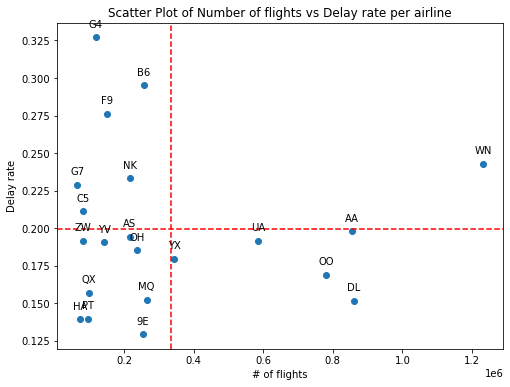

In [63]:
# Build scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(percentage_delay_airline['Flights'], percentage_delay_airline['Arrival_percentage_delay'])

# Get mean for x and y axis
mean_flights = percentage_delay_airline['Flights'].mean()
mean_delay_rate = percentage_delay_airline['Arrival_percentage_delay'].mean()

plt.xlabel('# of flights')
plt.ylabel('Delay rate')
plt.title('Scatter Plot of Number of flights vs Delay rate per airline')

# Add reference lines
plt.axvline(x=mean_flights, color='r', linestyle='--')
plt.axhline(y=mean_delay_rate, color='r', linestyle='--')

# Annotate graph with labels
for i, label in enumerate(percentage_delay_airline['Operating_Airline']):
    plt.annotate(label, (percentage_delay_airline['Flights'].iloc[i], percentage_delay_airline['Arrival_percentage_delay'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(False)
plt.show()

While AA is having average performance, it is slighty underperfroming similarly sized airlines, not as bad as cancellation though.

### Reasons for flight delays

In [64]:
delay_reasons = total_data[total_data['ArrDel15'] == 1].groupby(['Operating_Airline'], as_index = False).agg(Flights_delayed = ('Operating_Airline', 'size'),
                                                                                                             Carrier = ('CarrierDelay', 'mean'),
                                                                                                             Weather = ('WeatherDelay', 'mean'),
                                                                                                             NAS = ('NASDelay', 'mean'),
                                                                                                             Security = ('SecurityDelay', 'mean'),
                                                                                                             LateAircraft = ('LateAircraftDelay', 'mean')).reset_index()
delay_reasons

,index,Operating_Airline,Flights_delayed,Carrier,Weather,NAS,Security,LateAircraft
0,0,9E,32935,28.581327,6.511796,17.777289,0.050068,24.104145
1,1,AA,169487,29.649377,3.498038,10.941217,0.187401,29.203880
2,2,AS,42067,17.578553,1.831911,13.390567,0.383793,16.587705
3,3,B6,75401,35.244241,2.259267,12.563388,0.234108,26.965199
4,4,C5,17141,31.419579,4.205414,11.873928,0.002800,33.957470
5,5,DL,130409,35.831116,3.401690,11.235383,0.129968,18.166430
6,6,F9,41721,23.364157,1.628245,16.362336,0.000000,28.507418
7,7,G4,38843,19.066473,3.676493,12.807198,0.189120,29.786242
8,8,G7,14857,24.042135,4.060712,19.318167,0.009894,31.118934
9,9,HA,10136,27.696527,1.509570,0.478591,0.271014,13.382597


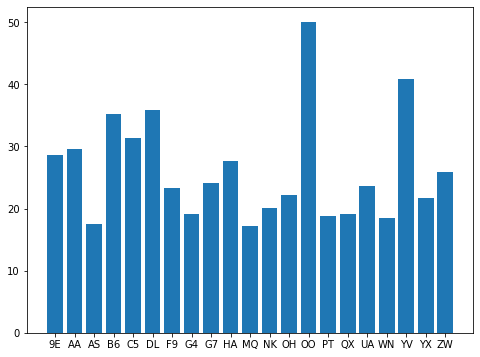

In [65]:
# Build scatter plot
plt.figure(figsize=(8, 6))
plt.bar(delay_reasons['Operating_Airline'], delay_reasons['Carrier'])
plt.grid(False)
plt.show()

AA seems to have a mid-table performance in carrier delays

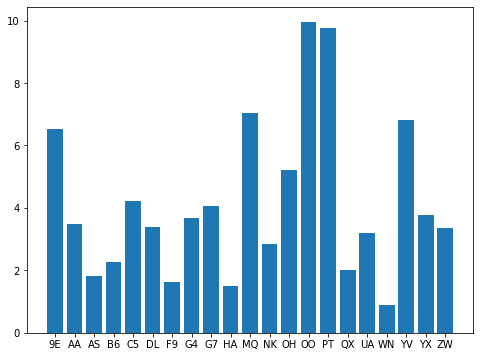

In [66]:
# Build scatter plot
plt.figure(figsize=(8, 6))
plt.bar(delay_reasons['Operating_Airline'], delay_reasons['Weather'])
plt.grid(False)
plt.show()

AA seems to have a mid performance in weather

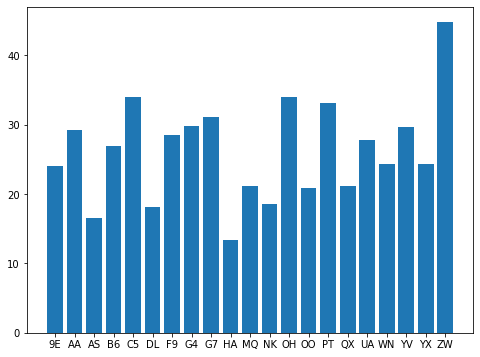

In [67]:
# Build scatter plot
plt.figure(figsize=(8, 6))
plt.bar(delay_reasons['Operating_Airline'], delay_reasons['LateAircraft'])
plt.grid(False)
plt.show()

AA seems to have a slightly high performance in aircraft delay

### Delayed flights by sector

In [68]:
# Create table of delays by sector for AA
delayed_flights_AA = total_data[total_data['Operating_Airline'] == 'AA'].groupby('Sector').agg(Flights=('Sector', 'size'), Delayed_flights=('DepDel15', 'sum')).reset_index()
delayed_flights_AA['%Delay'] = delayed_flights_AA['Delayed_flights'] / delayed_flights_AA['Flights']

In [69]:
# Create table for benchmark
delayed_flights_benchmark = total_data[total_data['Operating_Airline'] != 'AA'].groupby('Sector').agg(Flights_benchmark=('Sector', 'size'), Delayed_flights_benchmark=('DepDel15', 'sum')).reset_index()
delayed_flights_benchmark['%Delay_benchmark'] = delayed_flights_benchmark['Delayed_flights_benchmark'] / delayed_flights_benchmark['Flights_benchmark']

In [70]:
delayed_flights_AA = delayed_flights_AA.merge(delayed_flights_benchmark, on = 'Sector')

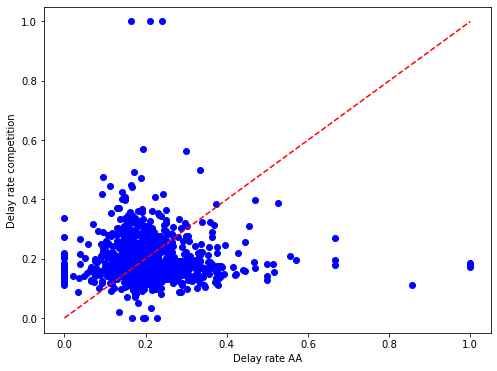

In [71]:
# Graph ratio of delays flights by sector of AA vs competition
plt.figure(figsize=(8, 6))
plt.scatter(delayed_flights_AA['%Delay'], delayed_flights_AA['%Delay_benchmark'], c='b', marker='o')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')

plt.xlabel('Delay rate AA')
plt.ylabel('Delay rate competition')

plt.grid(False)
plt.show()

Hard to say from the graph how AA is doing, it seems as if it's 50-50, let's account for relevance of the sector to evaluate.

In [72]:
delayed_flights_AA['Difference'] = delayed_flights_AA['%Delay_benchmark'] - delayed_flights_AA['%Delay']

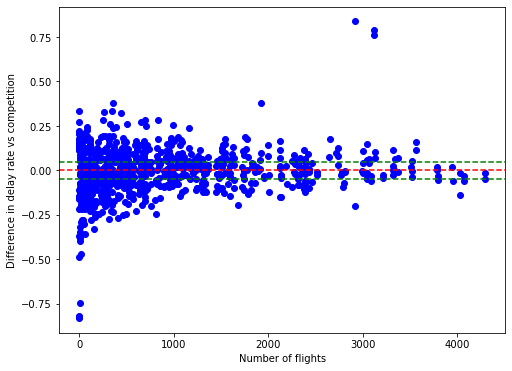

In [73]:
# Graph difference vs market vs volume of flights
plt.figure(figsize=(8, 6))
plt.scatter(delayed_flights_AA['Flights'], delayed_flights_AA['Difference'], c='b', marker='o')

plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=-0.05, color='g', linestyle='--')
plt.axhline(y=0.05, color='g', linestyle='--')

plt.xlabel('Number of flights')
plt.ylabel('Difference in delay rate vs competition')

plt.grid(False)
plt.show()

There is a mixed performance, in the most important sectors AA tends to have a higher delay ratio. There is a group of sector where AA is significantly performing better. What is clear is that there is a lot of dispersion on delay performance. Let's explore why this is happening and what's causing the delays.

### Delay reasons per sector

In [74]:
# Create table for AA
delay_reasons_AA = total_data[(total_data['ArrDel15'] == 1) & (total_data['Operating_Airline'] == 'AA')].groupby(['Sector'], as_index = False).agg(Flights_delayed = ('Sector', 'size'),
                                                                                                             Carrier = ('CarrierDelay', 'mean'),
                                                                                                             Weather = ('WeatherDelay', 'mean'),
                                                                                                             NAS = ('NASDelay', 'mean'),
                                                                                                             Security = ('SecurityDelay', 'mean'),
                                                                                                             LateAircraft = ('LateAircraftDelay', 'mean')).reset_index()

In [75]:
# Create table for competition
delay_reasons_benchmark = total_data[(total_data['ArrDel15'] == 1) & (total_data['Operating_Airline'] != 'AA')].groupby(['Sector'], as_index = False).agg(Flights_delayed_bench = ('Sector', 'size'),
                                                                                                             Carrier_bench = ('CarrierDelay', 'mean'),
                                                                                                             Weather_bench = ('WeatherDelay', 'mean'),
                                                                                                             NAS_bench = ('NASDelay', 'mean'),
                                                                                                             Security_bench = ('SecurityDelay', 'mean'),
                                                                                                             LateAircraft_bench = ('LateAircraftDelay', 'mean')).reset_index()

In [76]:
# Merge data
delay_reasons_AA = delay_reasons_AA.merge(delay_reasons_benchmark, on = 'Sector')
delay_reasons_AA.head()

,index_x,Sector,Flights_delayed,Carrier,Weather,NAS,Security,LateAircraft,index_y,Flights_delayed_bench,Carrier_bench,Weather_bench,NAS_bench,Security_bench,LateAircraft_bench
0,0,ABQ-DFW,333,39.813814,5.834835,7.654655,0.0,49.720721,21,12,3.583333,9.166667,15.583333,0.000000,58.000000
1,1,ABQ-ORD,17,16.705882,3.470588,19.117647,0.0,22.705882,31,118,20.737288,12.228814,13.330508,0.000000,28.296610
2,2,ABQ-PHX,67,27.179104,0.000000,6.776119,0.0,45.507463,33,398,20.660804,3.758794,4.947236,0.065327,32.324121
3,3,AGS-CLT,1,3.000000,0.000000,0.000000,0.0,19.000000,76,301,19.056478,6.996678,9.920266,0.099668,36.936877
4,4,AGS-DFW,7,32.857143,19.428571,1.000000,0.0,20.571429,78,51,33.411765,8.039216,12.568627,0.333333,9.647059


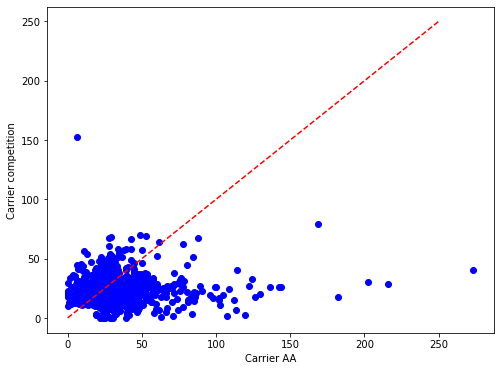

In [77]:
# Graph carrier
plt.figure(figsize=(8, 6))
plt.scatter(delay_reasons_AA['Carrier'], delay_reasons_AA['Carrier_bench'], c='b', marker='o')
plt.plot([0, 250], [0, 250], color='r', linestyle='--')

plt.xlabel('Carrier AA')
plt.ylabel('Carrier competition')

plt.grid(False)
plt.show()

Seems that AA has a long tail in carrier delays against them. Though for most of the flights it seems 50-50. Analyzing this versus how relevant the sectors are for AA will be important.

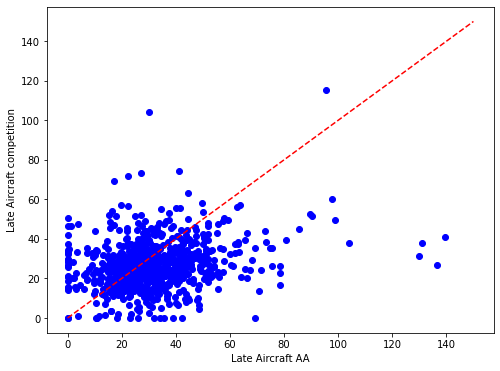

In [78]:
# Graph late aircraft
plt.figure(figsize=(8, 6))
plt.scatter(delay_reasons_AA['LateAircraft'], delay_reasons_AA['LateAircraft_bench'], c='b', marker='o')
plt.plot([0, 150], [0, 150], color='r', linestyle='--')

plt.xlabel('Late Aircraft AA')
plt.ylabel('Late Aircraft competition')

plt.grid(False)
plt.show()

Similar case than with carrier, probably a little bit more biased towards AA having longer wait times, need to evaluate performance vs relevance.

In [79]:
# Add number of flights to delay_reasons_AA to be able to plot sector relevance
delay_reasons_AA = delay_reasons_AA.merge(delayed_flights_AA[['Sector','Flights']], on = 'Sector')

In [80]:
# Create column of difference between competition and AA for carrier and late aircraft
delay_reasons_AA['Carrier_diff'] = delay_reasons_AA['Carrier_bench'] - delay_reasons_AA['Carrier']
delay_reasons_AA['LateAircraft_diff'] = delay_reasons_AA['LateAircraft_bench'] - delay_reasons_AA['LateAircraft']

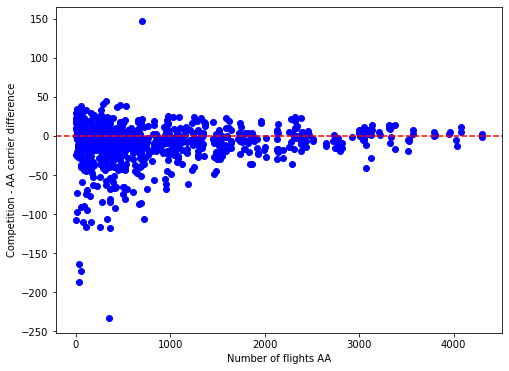

In [81]:
# Graph difference vs competition for carrier
plt.figure(figsize=(8, 6))
plt.scatter(delay_reasons_AA['Flights'], delay_reasons_AA['Carrier_diff'], c='b', marker='o')

plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Number of flights AA')
plt.ylabel('Competition - AA carrier difference')

plt.grid(False)
plt.show()

Overall, AA is performing worse than the competition across all relevant sectors with some small number of sectors where they are doing well.

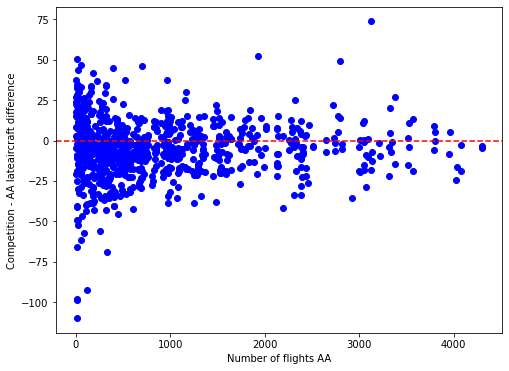

In [82]:
# Graph difference vs competition for late aircraft
plt.figure(figsize=(8, 6))
plt.scatter(delay_reasons_AA['Flights'], delay_reasons_AA['LateAircraft_diff'], c='b', marker='o')

plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Number of flights AA')
plt.ylabel('Competition - AA lateaircraft difference')

plt.grid(False)
plt.show()

Very disperse performance. In the most relevant sectors AA is underperforming significantly.

In [83]:
# Export data to use in PowerPoint
delay_reasons_AA.to_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/delays_AA.csv', index=False)

### Analyze airport performance

In [107]:
# Create table for AA
delayed_flights_AA_airport = total_data[(total_data['ArrDel15'] == 1) & (total_data['Operating_Airline'] == 'AA')].groupby('Origin').agg(Flights=('Origin', 'size'),
                                                                                                       Delayed_flights=('ArrDel15', 'sum'),
                                                                                                       Total_delay = ('ArrDelay', 'mean'),
                                                                                                       Carrier = ('CarrierDelay', 'mean'),
                                                                                                       Weather = ('WeatherDelay', 'mean'),
                                                                                                       NAS = ('NASDelay', 'mean'),
                                                                                                       Security = ('SecurityDelay', 'mean'),
                                                                                                       LateAircraft = ('LateAircraftDelay', 'mean')).reset_index()
delayed_flights_AA_airport['%Delay'] = delayed_flights_AA_airport['Delayed_flights'] / delayed_flights_AA_airport['Flights']

In [108]:
# Create table for competition
delayed_flights_airport = total_data[(total_data['ArrDel15'] == 1) & (total_data['Operating_Airline'] != 'AA')].groupby('Origin').agg(Flights_bench=('Origin', 'size'),
                                                                                                       Delayed_flights_bench=('ArrDel15', 'sum'),
                                                                                                       Total_delay_bench = ('ArrDelay', 'mean'),
                                                                                                       Carrier_bench = ('CarrierDelay', 'mean'),
                                                                                                       Weather_bench = ('WeatherDelay', 'mean'),
                                                                                                       NAS_bench = ('NASDelay', 'mean'),
                                                                                                       Security_bench = ('SecurityDelay', 'mean'),
                                                                                                       LateAircraft_bench = ('LateAircraftDelay', 'mean')).reset_index()
delayed_flights_airport['%Delay'] = delayed_flights_airport['Delayed_flights_bench'] / delayed_flights_airport['Flights_bench']

In [109]:
# Merge data and save for use in PowerPoint
delayed_flights_AA_airport = delayed_flights_AA_airport.merge(delayed_flights_airport, on = 'Origin')
delayed_flights_AA_airport.to_csv('C:/Users/Mauricio/Documents/Projects/Airlines case/delays_AA_airport.csv', index=False)

This data has been used in the PowerPoint